# FeatureEstimationDemo

### Read example BIDS data 

In this demo the basic offline workflow of py_neuromodulation will be demonstrated. For that, the example BIDS dataset in *pyneuromodulation/examples/data/* will be analyzed. 
The parametrization `nm_settings.json` is stored in the package directory *pyneuromodulation/nm_settings.json*, a `nm_channels.csv` is created given the *channel_type* information from the BIDS data. 

A projection will be defined based on the *pyneuromodulation/grid_cortex.tsv* and *pyneuromodulation/grid_subcortex.tsv* files. Band power features and sharpwave features will then be estimated and projected to the provided grid. 

First, necessary modules will be included and the BIDS_PATH and RUN_PATH, the path to the BIDS brainvision run file, will be defined given the example.

In [1]:
import sys
from bids import BIDSLayout
from matplotlib import pyplot as plt
import os
from scipy import io
import numpy as np
import json
from pathlib import Path
import scipy

# first specify path to get example folder, second py_neuromodulation folder
PATH_PYNEUROMODULATION = Path("__file__").absolute().parent.parent  # "__file__" required for ipynb
sys.path.append(os.path.join(PATH_PYNEUROMODULATION))

from pyneuromodulation import nm_start_BIDS, nm_settings, nm_IO, nm_define_nmchannels, nm_features, \
                              nm_generator, nm_rereference, nm_resample, nm_run_analysis, nm_normalization, nm_projection

sys.path.append(os.path.join(Path("__file__").absolute().parent.parent,'pyneuromodulation'))

print("PATH_PYNEUROMODULATION: " + str(PATH_PYNEUROMODULATION))
BIDS_EXAMPLE_PATH = os.path.abspath(os.path.join(PATH_PYNEUROMODULATION,
                                    'examples', 'data'))

PATH_RUN = os.path.join(BIDS_EXAMPLE_PATH, 'sub-testsub', 'ses-EphysMedOff',
                        'ieeg', "sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg.vhdr")

print("\nused run path: " + str(PATH_RUN))

PATH_PYNEUROMODULATION: C:\Users\ICN_admin\Documents\py_neuromodulation

used run path: C:\Users\ICN_admin\Documents\py_neuromodulation\examples\data\sub-testsub\ses-EphysMedOff\ieeg\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg.vhdr


In [2]:
PATH_RUN

'C:\\Users\\ICN_admin\\Documents\\py_neuromodulation\\examples\\data\\sub-testsub\\ses-EphysMedOff\\ieeg\\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg.vhdr'

In [3]:
BIDS_EXAMPLE_PATH

'C:\\Users\\ICN_admin\\Documents\\py_neuromodulation\\examples\\data'

In [4]:
PATH_PYNEUROMODULATION

WindowsPath('C:/Users/ICN_admin/Documents/py_neuromodulation')

In [5]:
nm_BIDS = nm_start_BIDS.NM_BIDS(PATH_RUN, PATH_BIDS=BIDS_EXAMPLE_PATH, PATH_GRIDS=
                               os.path.join(PATH_PYNEUROMODULATION, 'pyneuromodulation'))

Reading nm_settings.json.
Testing settings.
No Error occurred when testing the settings.
Extracting parameters from C:\Users\ICN_admin\Documents\py_neuromodulation\examples\data\sub-testsub\ses-EphysMedOff\ieeg\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\ICN_admin\Documents\py_neuromodulation\examples\data\sub-testsub\ses-EphysMedOff\ieeg\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_channels.tsv.
Reading in coordinate system frame Other: None.
Reading electrode coords from C:\Users\ICN_admin\Documents\py_neuromodulation\examples\data\sub-testsub\ses-EphysMedOff\ieeg\sub-testsub_ses-EphysMedOff_acq-StimOff_space-mni_electrodes.tsv.
The read in electrodes file is: 
 [('name', ['ECOG_AT_SM_L_1', 'ECOG_AT_SM_L_2', 'ECOG_AT_SM_L_3', 'ECOG_AT_SM_L_4', 'ECOG_AT_SM_L_5', 'ECOG_AT_SM_L_6', 'LFP_STN_R_234', 'LFP_STN_R_567', 'LFP_BS_STN_L_1', 'LFP_STN_L_234', 'LFP_STN_L_567', 'LFP_3_R_STN_PI', 'LFP_4_R_

C:\Users\ICN_admin\Anaconda3\envs\pyneuromodulation\lib\site-packages\mne_bids\path.py:1303: RuntimeWarning: Did not find any events.tsv associated with sub-testsub_ses-EphysMedOff_task-buttonpress_run-0.

The search_str was "C:\Users\ICN_admin\Documents\py_neuromodulation\examples\data\sub-testsub\**\sub-testsub_ses-EphysMedOff*events.tsv"
  warn(msg)
C:\Users\ICN_admin\Anaconda3\envs\pyneuromodulation\lib\site-packages\mne_bids\dig.py:467: RuntimeWarning: Defaulting coordinate frame to unknown from coordinate system input Other
  warn(f"Defaulting coordinate frame to unknown "
C:\Users\ICN_admin\Anaconda3\envs\pyneuromodulation\lib\site-packages\mne_bids\dig.py:514: RuntimeWarning: There are channels without locations (n/a) that are not marked as bad: ['ANALOG_ROT_R_1']
  warn(f"There are channels without locations "
C:\Users\ICN_admin\Anaconda3\envs\pyneuromodulation\lib\site-packages\mne_bids\dig.py:521: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to 

Segment lengths (ms): [1000  500  333  333  100  100  100]
No data specified. Sanity checks related to the length of the signal relative to the filter order will be skipped.
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 4.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 4.00 Hz (-6 dB cutoff frequency: 10.00 Hz)
- Filter length: 999 samples (0.999 sec)

No data specified. Sanity checks related to the length of the signal relative to the filter order will be skipped.
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) metho

Next, the used settings will be read, and mne-bids will be used to read the example data.

In [6]:
nm_BIDS.settings_wrapper.settings['BIDS_path']

'C:\\Users\\ICN_admin\\Documents\\py_neuromodulation\\examples\\data'

Let's check the specified `nm_channels` dataframe: 

In [7]:
nm_BIDS.settings_wrapper.nm_channels

,name,rereference,used,target,type,status,new_name
0,LFP_STN_R_234,LFP_STN_R_567,1,0,seeg,good,LFP_STN_R_234-LFP_STN_R_567
1,LFP_STN_R_567,LFP_STN_R_234,1,0,seeg,good,LFP_STN_R_567-LFP_STN_R_234
2,LFP_BS_STN_L_1,LFP_STN_L_567,1,0,seeg,good,LFP_BS_STN_L_1-LFP_STN_L_567
3,LFP_STN_L_234,LFP_BS_STN_L_1,1,0,seeg,good,LFP_STN_L_234-LFP_BS_STN_L_1
4,LFP_STN_L_567,LFP_STN_L_234,1,0,seeg,good,LFP_STN_L_567-LFP_STN_L_234
5,ECOG_AT_SM_L_1,average,1,0,ecog,good,ECOG_AT_SM_L_1-avgref
6,ECOG_AT_SM_L_2,average,1,0,ecog,good,ECOG_AT_SM_L_2-avgref
7,ECOG_AT_SM_L_3,average,1,0,ecog,good,ECOG_AT_SM_L_3-avgref
8,ECOG_AT_SM_L_4,average,1,0,ecog,good,ECOG_AT_SM_L_4-avgref
9,ECOG_AT_SM_L_5,average,1,0,ecog,good,ECOG_AT_SM_L_5-avgref


The data contains depth LFP electrodes from the Subthalamic Nucleus (STN) and a ECoG strip electrode. Bipolar rereferencing was defined by default for the depth electrodes, and common average rereference for the ECoG electrodes. 
Importantly *ANALOG_ROT_R_1* is used as a target channel. After feature estimation, this channel will be normalized and added in a time aligned manner to the features output csv file. 

Next we will check the used settings:

In [8]:
nm_BIDS.settings_wrapper.settings

{'BIDS_path': 'C:\\Users\\ICN_admin\\Documents\\py_neuromodulation\\examples\\data',
 'out_path': 'C:\\Users\\ICN_admin\\Documents\\Decoding_Toolbox\\write_out\\try_1708\\Beijing',
 'sampling_rate_features': 10,
 'methods': {'raw_resampling': True,
  'raw_normalization': False,
  'feature_normalization': True,
  'kalman_filter': True,
  're_referencing': True,
  'notch_filter': True,
  'bandpass_filter': True,
  'raw_hjorth': True,
  'sharpwave_analysis': True,
  'return_raw': False,
  'project_cortex': True,
  'project_subcortex': False,
  'pdc': False,
  'dtf': False},
 'raw_resampling_settings': {'resample_freq': 1000},
 'raw_normalization_settings': {'normalization_time': 30,
  'normalization_method': 'zscore',
  'clip': 3},
 'feature_normalization_settings': {'normalization_time': 30,
  'normalization_method': 'zscore',
  'clip': 3},
 'kalman_filter_settings': {'Tp': 0.1,
  'sigma_w': 0.7,
  'sigma_v': 1,
  'frequency_bands': ['low gamma', 'high gamma', 'all gamma']},
 'bandpass_f

Many signal processing and feature estimation parameters are here defined. Most importantly the `setttings["methods"]` tells us which signal processing and features should be estimated: 

In [9]:
nm_BIDS.settings_wrapper.settings["methods"]

{'raw_resampling': True,
 'raw_normalization': False,
 'feature_normalization': True,
 'kalman_filter': True,
 're_referencing': True,
 'notch_filter': True,
 'bandpass_filter': True,
 'raw_hjorth': True,
 'sharpwave_analysis': True,
 'return_raw': False,
 'project_cortex': True,
 'project_subcortex': False,
 'pdc': False,
 'dtf': False}

As defined, data will be **resampled**, **normalized** and **rereferenced** (as defined in the nm_channels) before feature estimation. Then, **bandpower features**, **sharpwave features** and **hjorth parameters** are calculated. Additionally, gamma band features will be Kalman filtered. Since *project_cortex* is set to true, projection to a grid is also enabled. 

### Grid projection

Next we will read the cortical grid, defined in *pyneuromodulation/grid_cortex.tsv*, and calculate the **projection matrix** from individual channels to the grid:

We can now inspect the individual coordinates, and the projected grid points. Therfore we read first a standard MNI hull, defined in the plot folder:

In [10]:
PATH_PLOT =os.path.join(os.pardir, 'plots')
faces = io.loadmat(os.path.join(PATH_PLOT, 'faces.mat'))
vertices = io.loadmat(os.path.join(PATH_PLOT, 'Vertices.mat'))
grid = io.loadmat(os.path.join(PATH_PLOT, 'grid.mat'))['grid']
x_ecog = vertices['Vertices'][::1,0]
y_ecog = vertices['Vertices'][::1,1]
z_ecog = vertices['Vertices'][::1,2]

Since the grid is defined for the left hemisphere, we might switch the x coordinates for right electrodes. Then the ECoG channel coordinates and used grid points are visualized:  

(-79.05561408996581, 79.27910194396972, -116.16637420654297, 83.09801483154297)

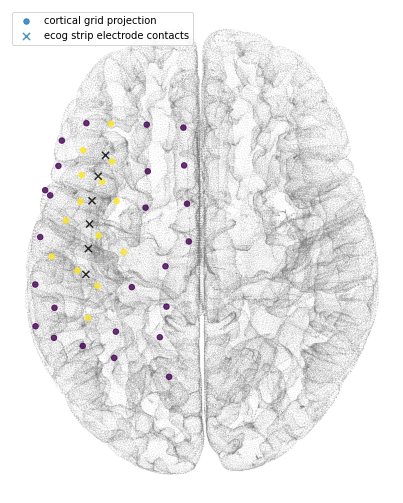

In [11]:
cortex_grid = np.array(nm_BIDS.projection.grid_cortex.T)

if nm_BIDS.settings_wrapper.settings["sess_right"] is True:
    cortex_grid[0,:] = cortex_grid[0,:]*-1
    ecog_strip = np.array(nm_BIDS.settings_wrapper.settings["coord"]["cortex_right"]["positions"]).T
else:
    ecog_strip = np.array(nm_BIDS.settings_wrapper.settings["coord"]["cortex_left"]["positions"]).T


fig, axes = plt.subplots(1,1, facecolor=(1,1,1), \
                        figsize=(14,9))#, dpi=300)
axes.scatter(x_ecog, y_ecog, c="gray", s=0.001)
axes.axes.set_aspect('equal', anchor='C')

grid_color = nm_BIDS.projection.proj_matrix_cortex.sum(axis=1)
pos_ecog = axes.scatter(cortex_grid[0,:],
                        cortex_grid[1,:], c=grid_color, 
                        s=30, alpha=0.8, cmap="viridis", label="cortical grid projection")

pos_elec = axes.scatter(ecog_strip[0,:],
                        ecog_strip[1,:], c=np.ones(ecog_strip.shape[1]), 
                        s=50, alpha=0.8, cmap="gray", marker="x", label="ecog strip electrode contacts")
axes.legend(loc='best')
axes.axis('off')

As visible, only grid points are active (channel data is projected unto them as shown in yellow) within the *max_dist* of every individual channel for the cortical and subcortical grid (as specified in the `nm_settings.json`). 

Next, the **rereference** and **resample** classes get instantiated, and an acquisition system is simulated by a **generator**:

### Feature Estimation 

Now the used **feature** and **run_analysis** classes are instantiated. Here FIR Filters and Kalman Filters are parametrized. During online feature estimation filters only have to be applied, instead of a repetitive calculatation, which saves computational time. 

Given the previously initialized generator, we can now receive a first data batch of 1 sec in shape (channels, samples): 

In [23]:
ieeg_batch = next(nm_BIDS.gen, None)

This allows us to estimate the previously assigned features:

In [24]:
ieeg_batch.shape

(12, 1375)

In [26]:
#for i in range(10):
if ieeg_batch is not None:
    nm_BIDS.run_analysis.run(ieeg_batch)

1.2 seconds of data processed
Last batch took: 0.1 seconds


As seen above already 1629 features are calculated based on this data batch. For every analyzed data batch, a subsequent row is appended to the run_analysis_.feature_arr. Let's show some features for a signle channel: 

In [27]:
ch = 'ECOG_AT_SM_L_1'
ch_cols = [f_ for f_ in nm_BIDS.run_analysis.feature_arr.columns if ch in f_]

In [28]:
nm_BIDS.run_analysis.feature_arr[ch_cols].T  # upper run_analysis was called three times for consective data batches

,0,1,2
ECOG_AT_SM_L_1-avgref_bandpass_activity_theta,0.0,-1.0,-1.410518
ECOG_AT_SM_L_1-avgref_bandpass_activity_alpha,0.0,-1.0,-1.234144
ECOG_AT_SM_L_1-avgref_bandpass_activity_low beta,0.0,-1.0,-0.535153
ECOG_AT_SM_L_1-avgref_bandpass_activity_high beta,0.0,1.0,-0.412425
ECOG_AT_SM_L_1-avgref_bandpass_activity_low gamma,0.0,1.0,1.147745
ECOG_AT_SM_L_1-avgref_bandpass_activity_high gamma,0.0,1.0,1.107875
ECOG_AT_SM_L_1-avgref_bandpass_activity_HFA,0.0,1.0,1.119139
ECOG_AT_SM_L_1-avgref_RawHjorth_Activity,0.0,1.0,-1.330298
ECOG_AT_SM_L_1-avgref_RawHjorth_Mobility,0.0,-1.0,1.412174
ECOG_AT_SM_L_1-avgref_RawHjorth_Complexity,0.0,-1.0,-1.399995


### Sharpwave features
Now let's investigate sharpwave features. First, data for a specific channel is bandpass filtered in a predefined range (here 5 - 80 Hz).

In [18]:
normalize_samples = int(nm_BIDS.settings_wrapper.settings["raw_normalization_settings"]["normalization_time"] *nm_BIDS.fs)
raw_norm = nm_normalization.normalize_raw(ieeg_batch, normalize_samples, nm_BIDS.fs, method='mean', clip=False)

Then troughs and peaks are identified, subsequently different features are estimated. 

In this example plot, the trough sharpness is visualized for the estimated data batch:

In [97]:
# data is being filtered in get_sharpwave_features

data = raw_norm[ch_idx,:]
nm_BIDS.run_analysis.features.sw_features.initialize_sw_features() 
nm_BIDS.run_analysis.features.sw_features.filtered_data = np.convolve(data,
                                                nm_BIDS.run_analysis.features.sw_features.filter, mode='same')
nm_BIDS.run_analysis.features.sw_features.analyze_waveform()
trough_dist = nm_BIDS.run_analysis.features.sw_features.sw_settings["detect_troughs"]["distance_troughs"]
peak_dist = nm_BIDS.run_analysis.features.sw_features.sw_settings["detect_troughs"]["distance_peaks"]    

peaks = scipy.signal.find_peaks(nm_BIDS.run_analysis.features.sw_features.filtered_data, distance=peak_dist)[0]
troughs = scipy.signal.find_peaks(-nm_BIDS.run_analysis.features.sw_features.filtered_data, distance=trough_dist)[0]


<Figure size 2700x1050 with 0 Axes>

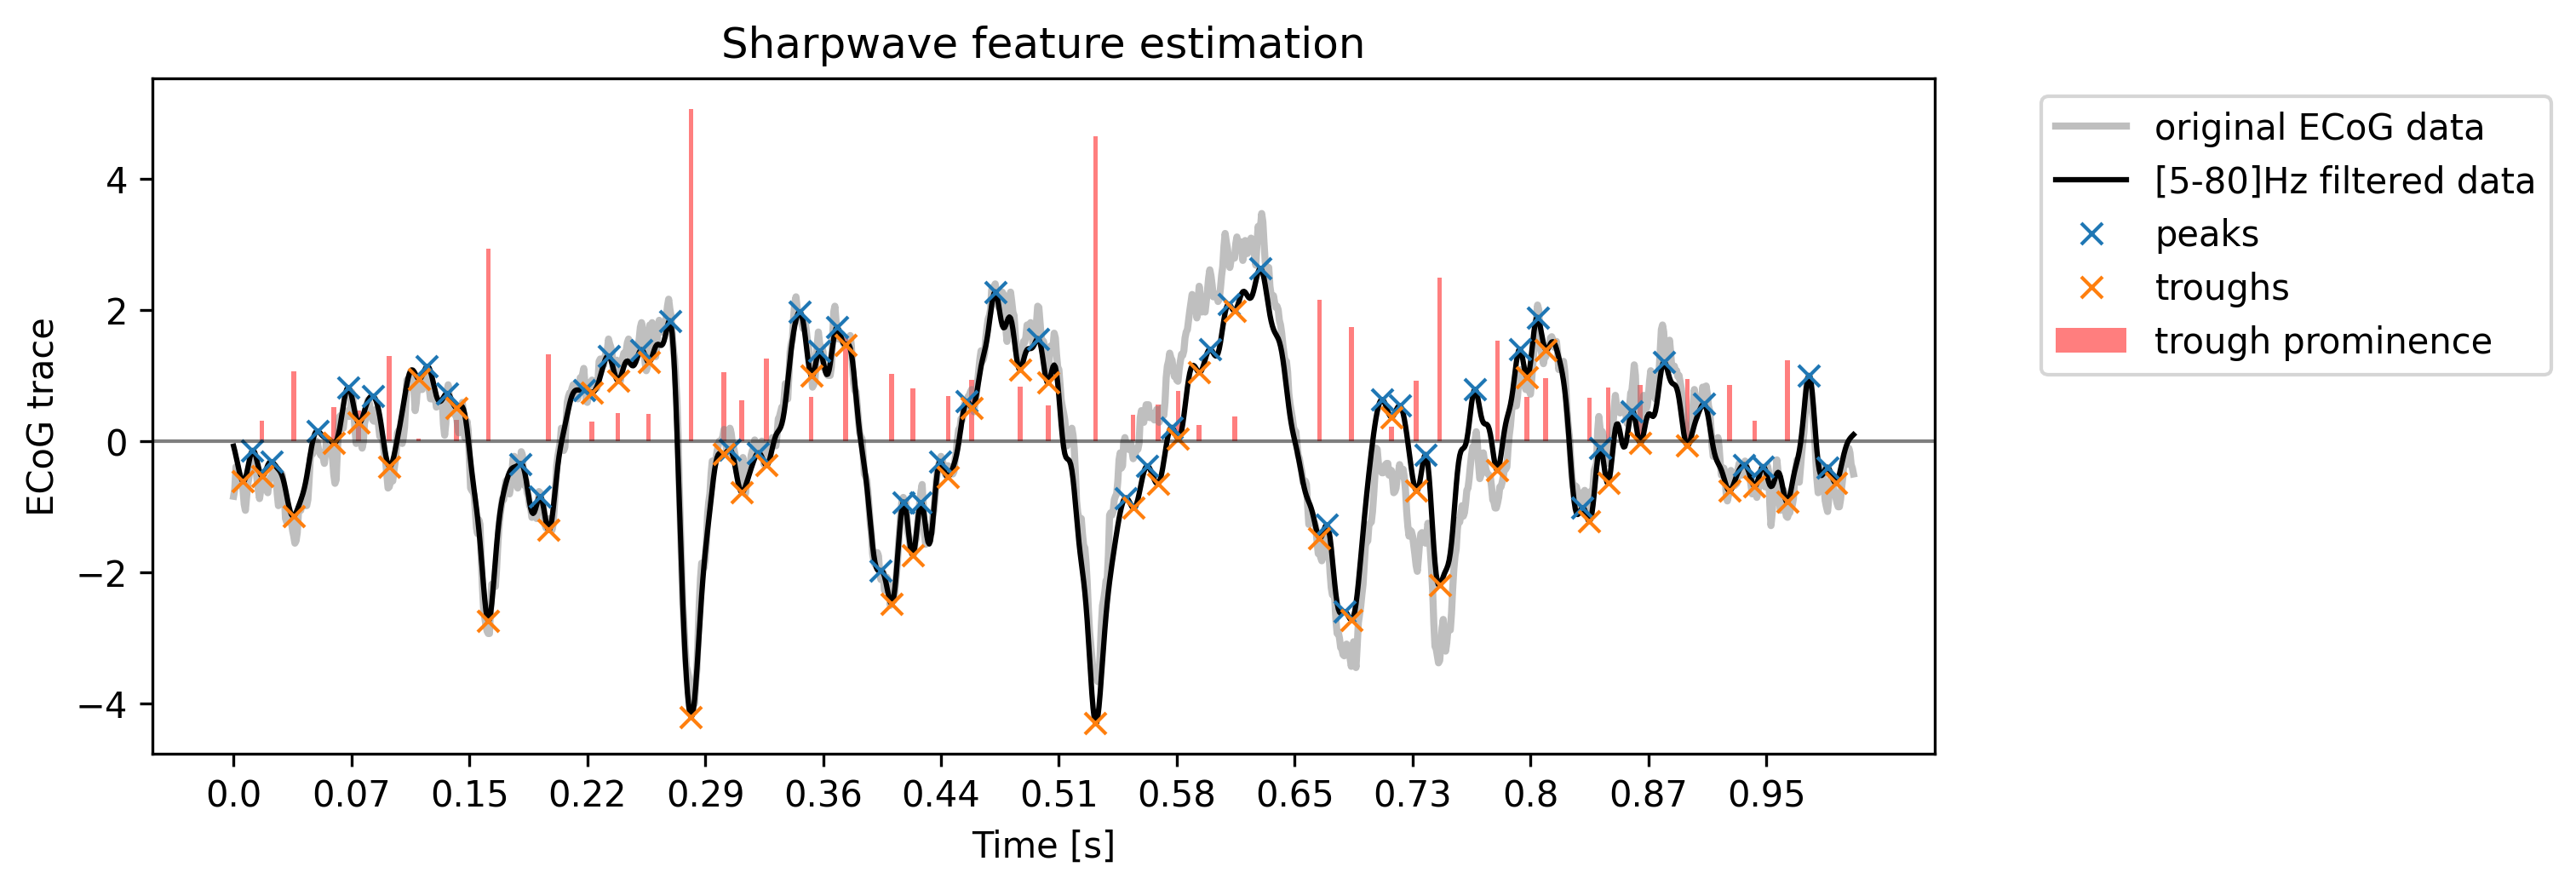

In [100]:
time_ = np.arange(0, data.shape[0], 1)/1375
plt.figure(figsize=(9,3.5), dpi=300)

plt.figure(figsize=(9,3.5), dpi=300)
plt.plot(data, color="gray", linewidth=2, alpha=0.5, label="original ECoG data")
plt.plot(nm_BIDS.run_analysis.features.sw_features.filtered_data, color="black", label="[5-80]Hz filtered data")
plt.plot(peaks, nm_BIDS.run_analysis.features.sw_features.filtered_data[peaks], "x", label="peaks")
plt.plot(troughs, nm_BIDS.run_analysis.features.sw_features.filtered_data[troughs], "x", label="troughs")
plt.bar(troughs[1:-1], nm_BIDS.run_analysis.features.sw_features.prominence, width=4, color="red",
       label="trough prominence", alpha=0.5)

plt.axhline(0, linewidth=1, color="black", alpha=0.5)
plt.xticks(np.arange(0, 1375, 100), np.round(np.arange(0, 1375, 100)/1375,2))
plt.xlabel("Time [s]")
plt.ylabel("ECoG trace")
plt.title("Sharpwave feature estimation")
plt.legend(bbox_to_anchor=(1.05, 1))

As seen above this sharpness characteristic is a useful feature for any decoding analysis, and might represent additional signal decoding characteristics. Since in one data batch a different number of peaks and troughs can be detected, the returning feature_arr included features of certain predefined operations on these sharpwave characteristics within this batch. Those are defined in the "estimator" key:

In [73]:
nm_BIDS.run_analysis.settings["sharpwave_analysis_settings"]

{'sharpwave_features': {'peak_left': True,
  'peak_right': True,
  'trough': True,
  'width': True,
  'prominence': True,
  'interval': True,
  'decay_time': True,
  'rise_time': True,
  'sharpness': True,
  'rise_steepness': True,
  'decay_steepness': True,
  'slope_ratio': False},
 'filter_low_cutoff': 5,
 'filter_high_cutoff': 80,
 'detect_troughs': {'estimate': True,
  'distance_troughs': 15,
  'distance_peaks': 15},
 'detect_peaks': {'estimate': True,
  'distance_troughs': 15,
  'distance_peaks': 15},
 'estimator': {'mean': True,
  'median': False,
  'max': True,
  'min': False,
  'var': False}}

E.g. in this example the median, max, min and variance of all sharpness features would be returned. 